In [1]:
import os

os.sys.path.append(os.path.join(os.getcwd(), "../../.."))
from charts.cohen import plot_cohen_kappa
from models.LLMOutput import ConfidenceType
from utils.helpers import print_prompts
from metrics.run import gather_data_for_run_ids
from charts.calibration import plot_confidence_calibration_curve
from metrics.agreement.krippendorff import compute_krippendorff_alpha
from charts.performance import (
    plot_precision,
    plot_recall,
    plot_f1_score,
    plot_support_counts,
    plot_precision_heatmap,
    plot_recall_heatmap,
    plot_f1_score_heatmap,
)

# Analyzing results for experience #3


In [2]:
RUN_IDS = [
    "66fbb3e2702555c1c1468a98",
    "66fbb87990c2d6ed9635cee9",
    "66fbbcf2dcb590994136a18f",
]

RUN_INFOS = gather_data_for_run_ids(RUN_IDS)

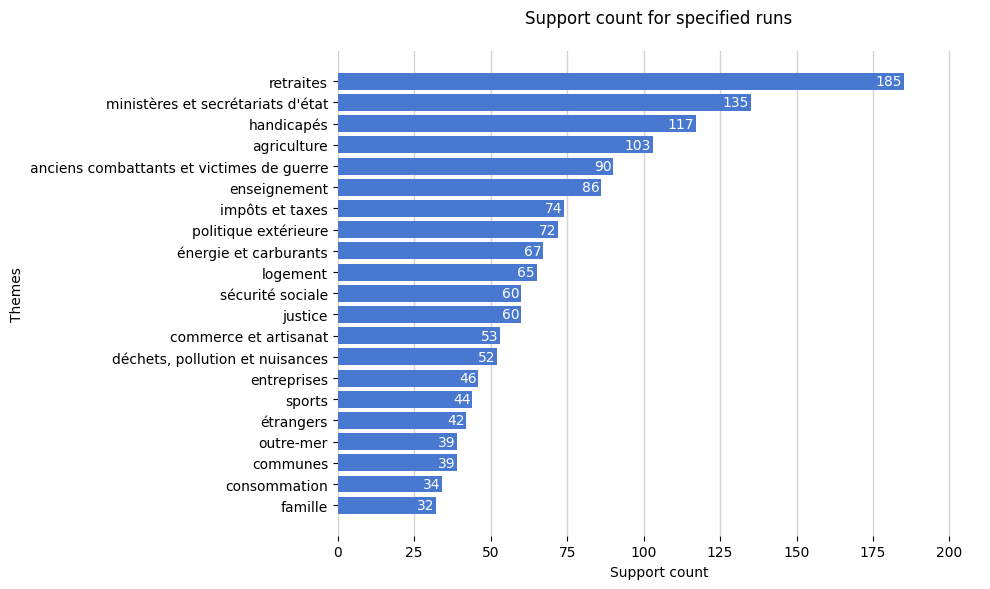

In [3]:
plot_support_counts(RUN_IDS, save_folder="images/experience_1/metrics")

In [4]:
print_prompts(RUN_INFOS[0]["prompts"])

system: Ton rôle est d'attribuer un thème à une question posée par un député à l'Assemblée nationale française. La liste des thèmes est la suivante :
- retraites
- ministères et secrétariats d'état
- handicapés
- enseignement
- politique extérieure
- agriculture
- logement
- anciens combattants et victimes de guerre
- énergie et carburants
- impôts et taxes
- sécurité sociale
- justice
- entreprises
- outre-mer
- déchets, pollution et nuisances
- communes
- commerce et artisanat
- sports
- consommation
- famille
- étrangers
Ta réponse doit contenir une seule chose: le thème correspondant, par exemple `retraites` ou `ministères et secrétariats d'état`. Le thème assigné doit être un des thèmes de la liste fournie. Seuls les thèmes de la liste précédente sont valides.

user: {0}



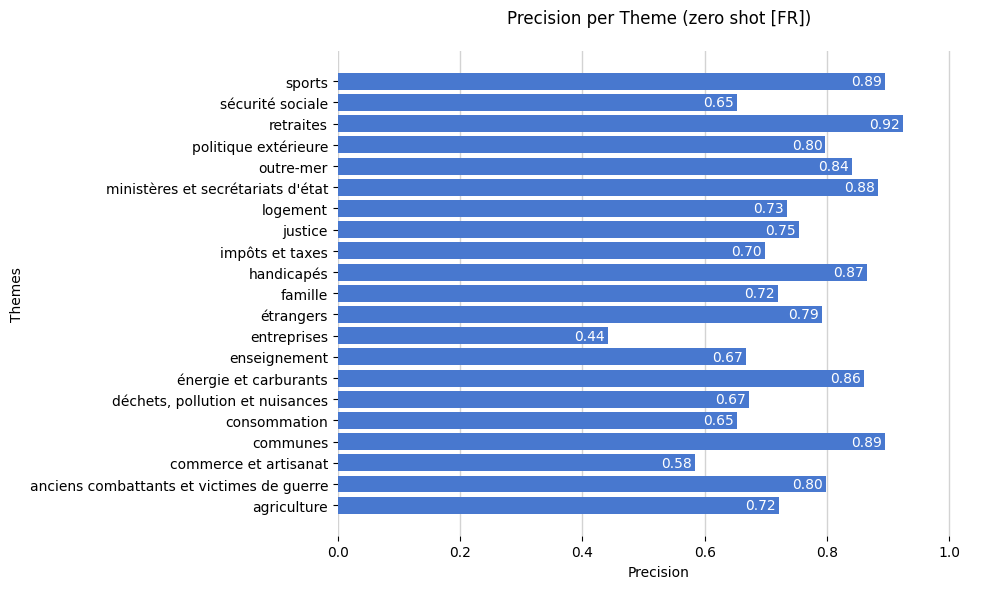

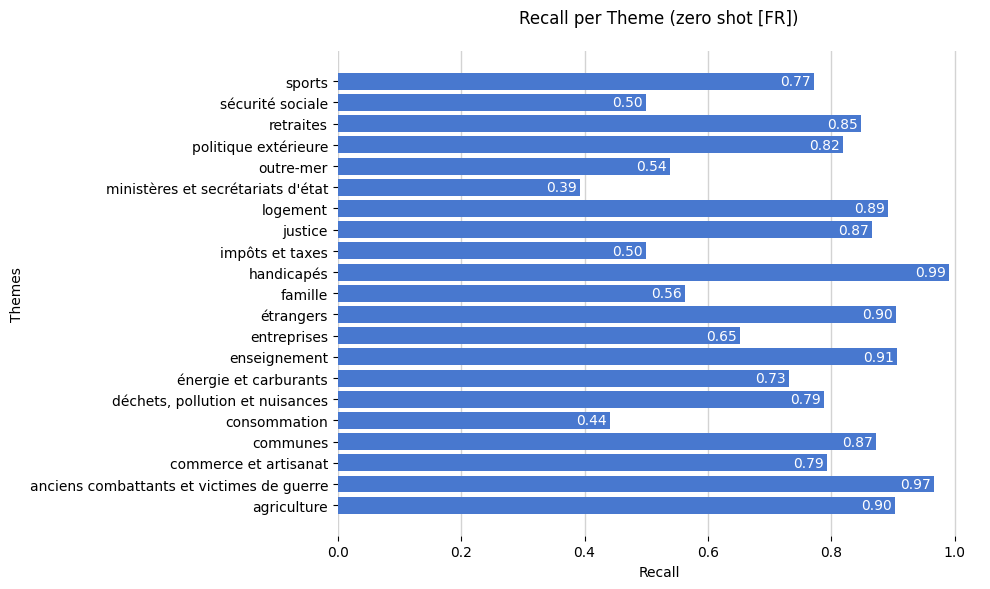

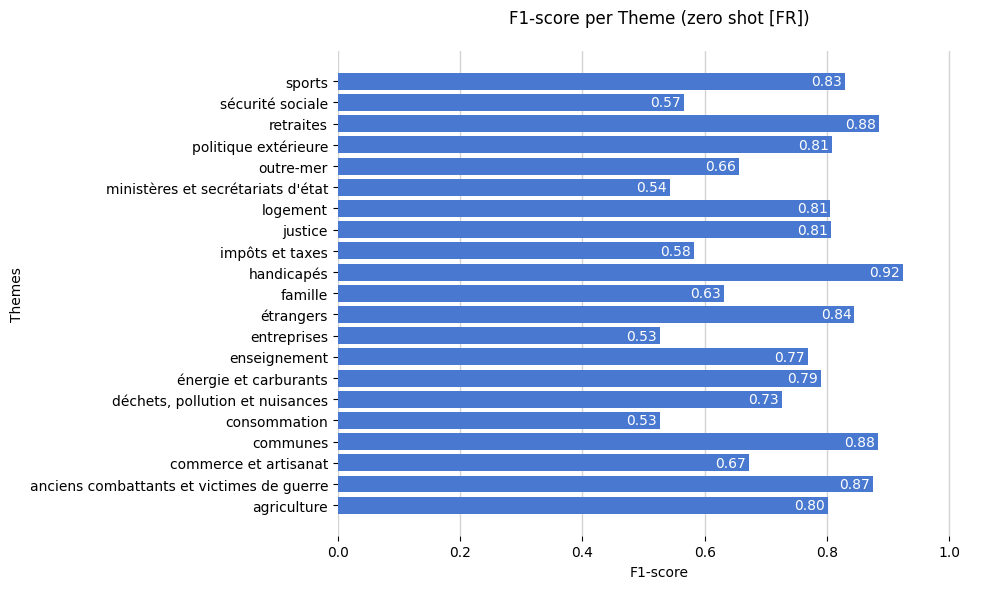

In [5]:
plot_precision(RUN_IDS[0], save_folder="images/experience_3/metrics")
plot_recall(RUN_IDS[0], save_folder="images/experience_3/metrics")
plot_f1_score(RUN_IDS[0], save_folder="images/experience_3/metrics")

In [6]:
print_prompts(RUN_INFOS[1]["prompts"])

system: Your role is to assign a theme to a question asked by a member of the French National Assembly. The list of themes is as follows:
- retraites
- ministères et secrétariats d'état
- handicapés
- enseignement
- politique extérieure
- agriculture
- logement
- anciens combattants et victimes de guerre
- énergie et carburants
- impôts et taxes
- sécurité sociale
- justice
- entreprises
- outre-mer
- déchets, pollution et nuisances
- communes
- commerce et artisanat
- sports
- consommation
- famille
- étrangers
Your response should contain only one thing: the corresponding theme, for example `retraites` or `ministères et secrétariats d'état`. The assigned theme must be one of the themes from the provided list. Only the themes from the previous list are valid.

user: {0}



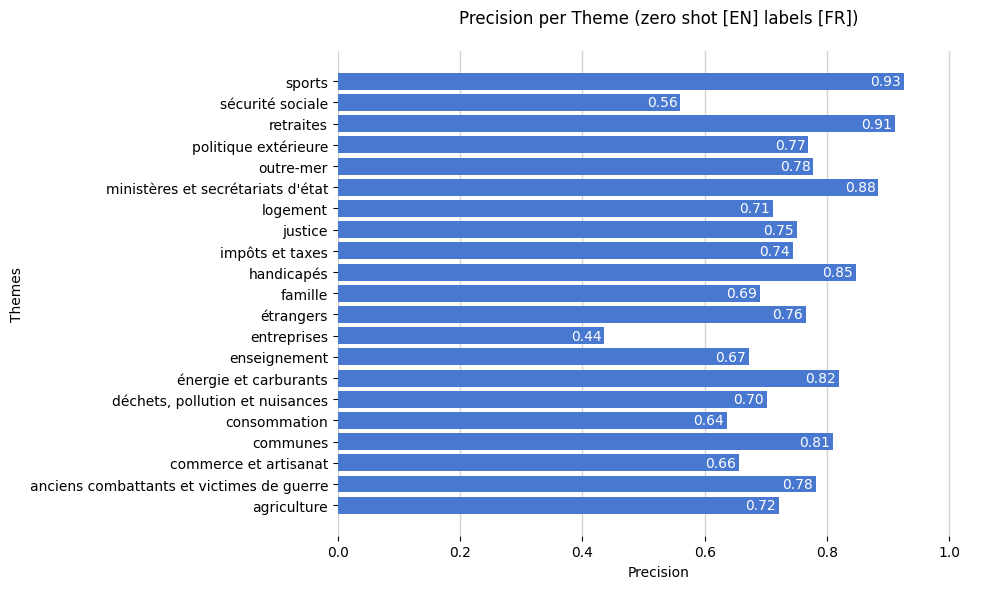

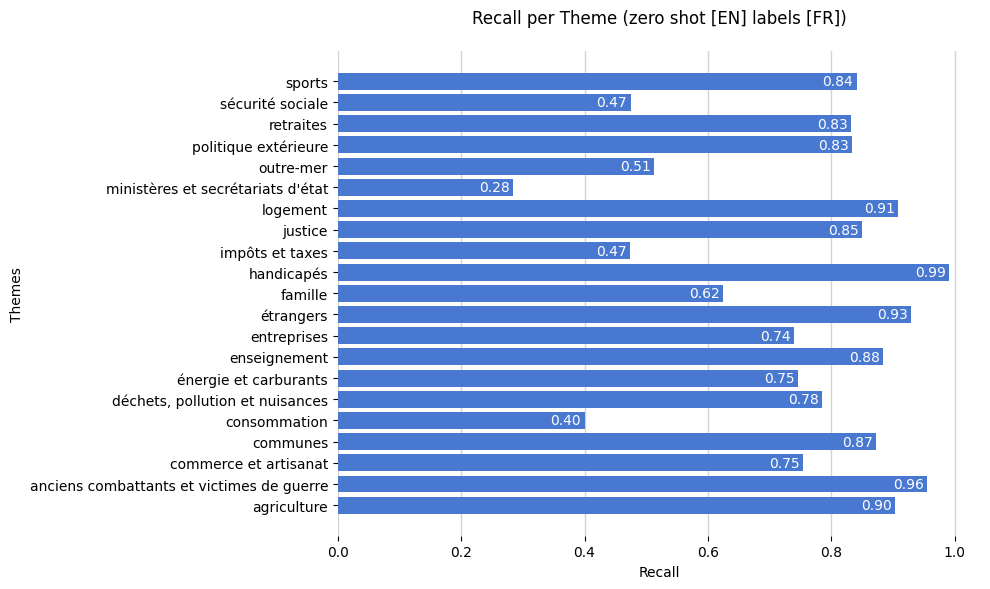

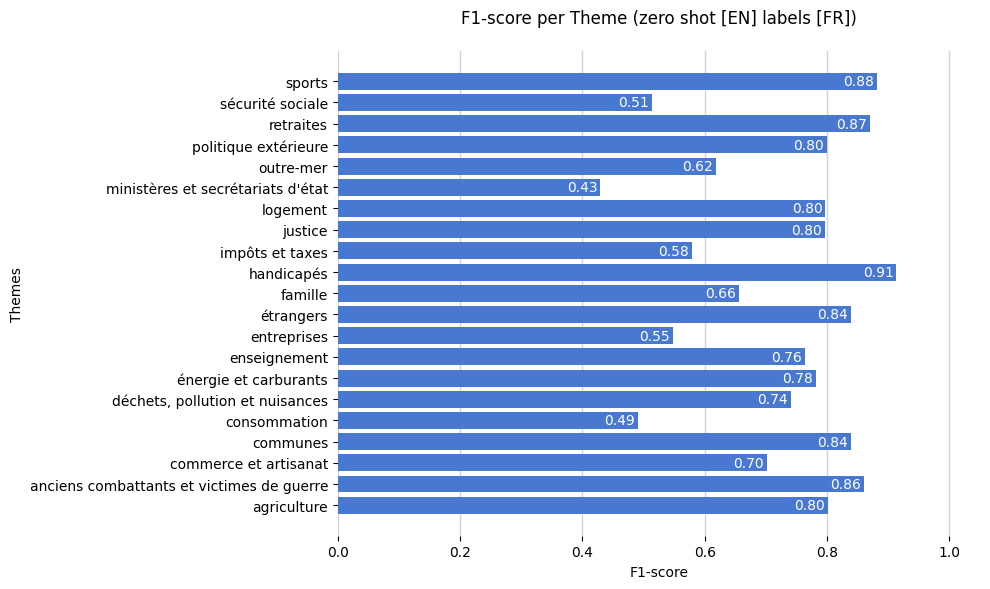

In [7]:
plot_precision(RUN_IDS[1], save_folder="images/experience_3/metrics")
plot_recall(RUN_IDS[1], save_folder="images/experience_3/metrics")
plot_f1_score(RUN_IDS[1], save_folder="images/experience_3/metrics")

In [8]:
print_prompts(RUN_INFOS[2]["prompts"])

system: Your role is to assign a theme to a question asked by a member of the French National Assembly. The list of themes is as follows:
- retirement
- ministries and state secretariats
- disabled people
- education
- foreign policy
- agriculture
- housing
- veterans and war victims
- energy and fuels
- taxes and levies
- social security
- justice
- businesses
- overseas territories
- waste, pollution, and nuisances
- municipalities
- commerce and craftsmanship
- sports
- consumption
- family
- foreigners
Your response should contain only one thing: the corresponding theme, for example `retirement` or `ministries and state secretariats`. The assigned theme must be one of the themes from the provided list. Only the themes from the previous list are valid.

user: {0}



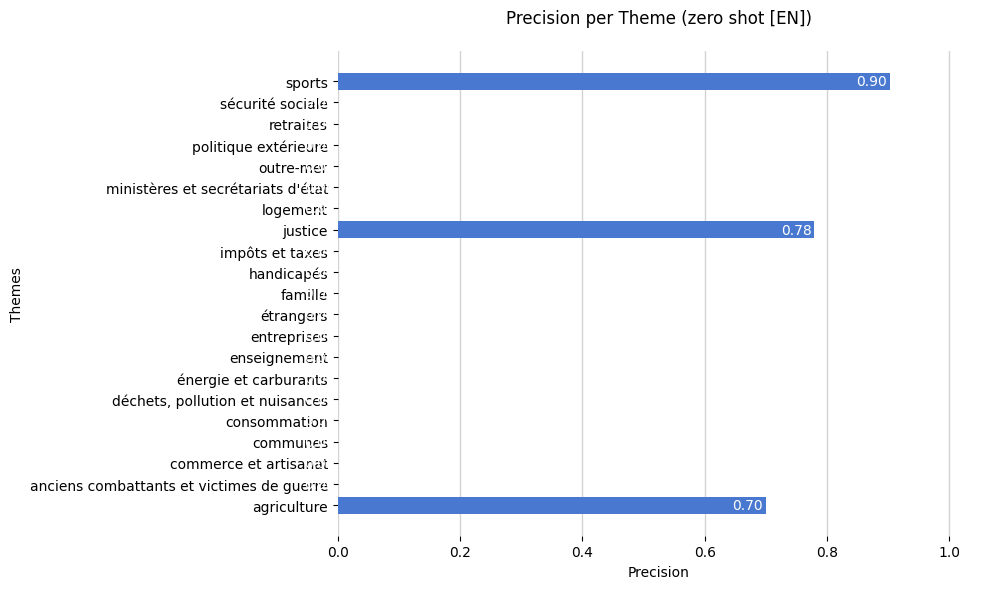

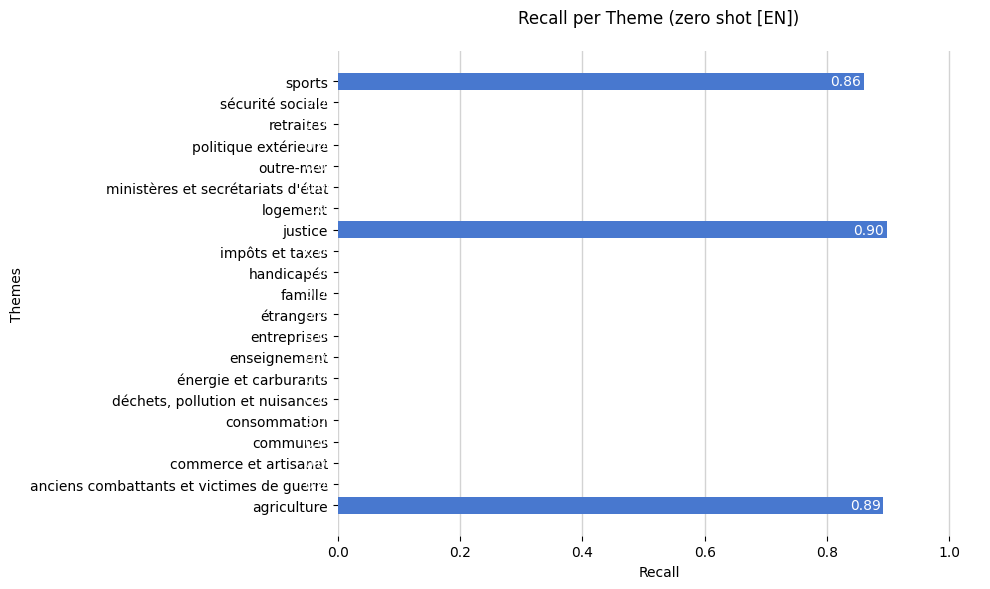

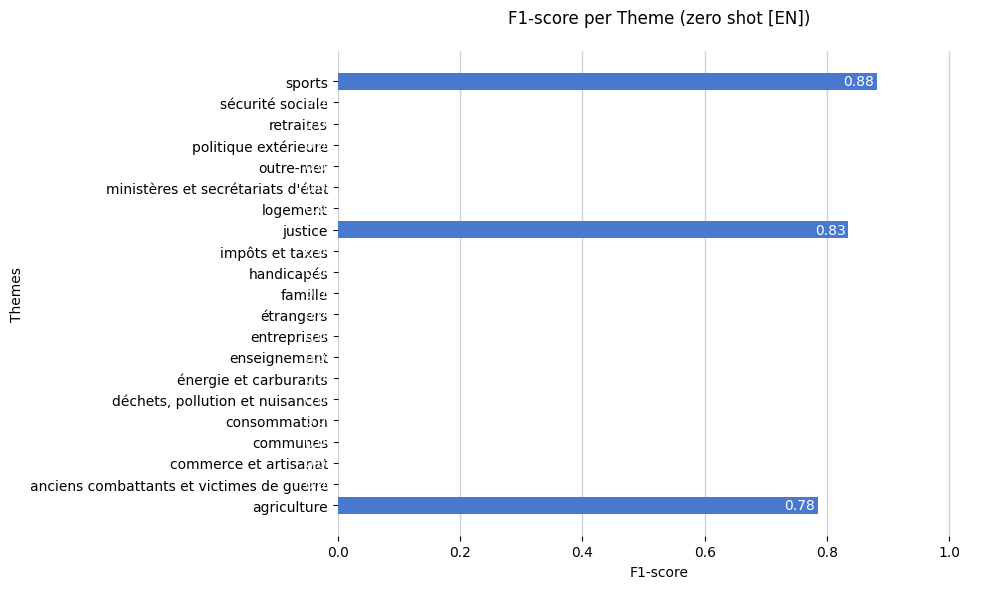

In [9]:
plot_precision(RUN_IDS[2], save_folder="images/experience_3/metrics")
plot_recall(RUN_IDS[2], save_folder="images/experience_3/metrics")
plot_f1_score(RUN_IDS[2], save_folder="images/experience_3/metrics")

## Comparing the strategies

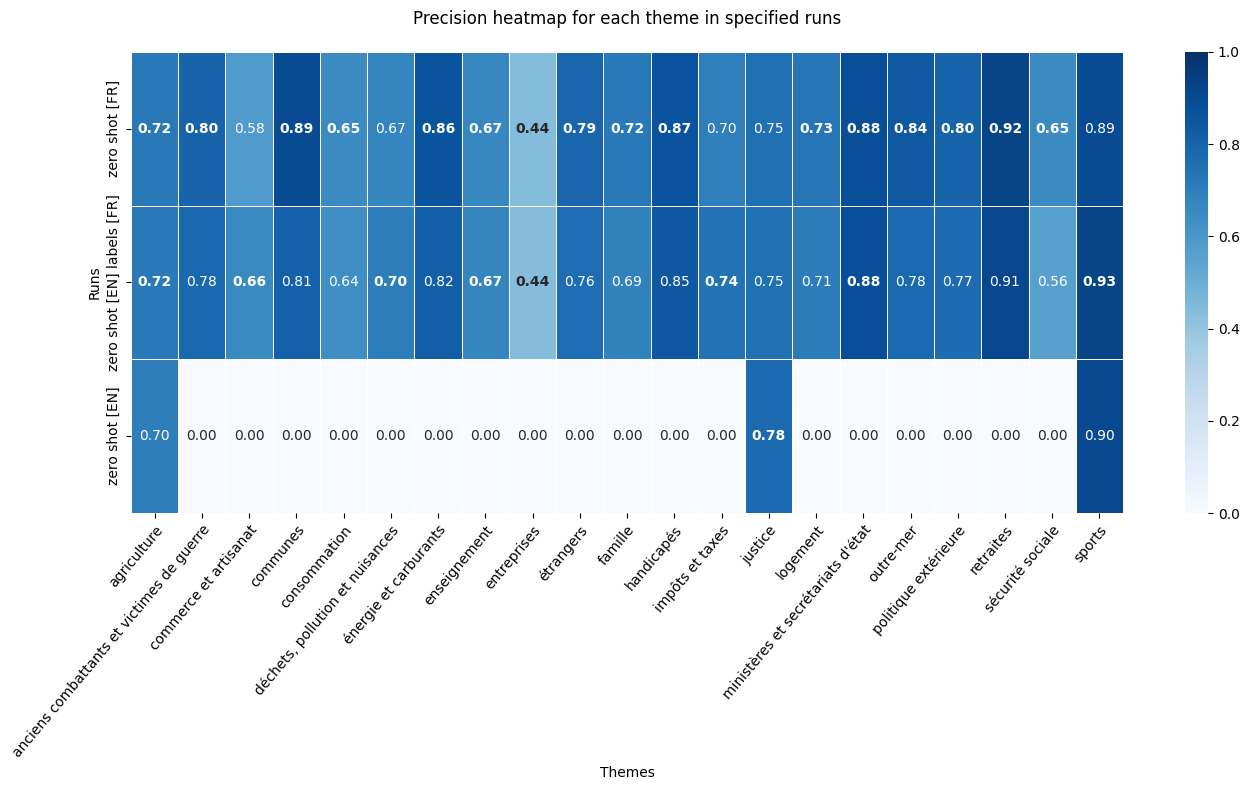

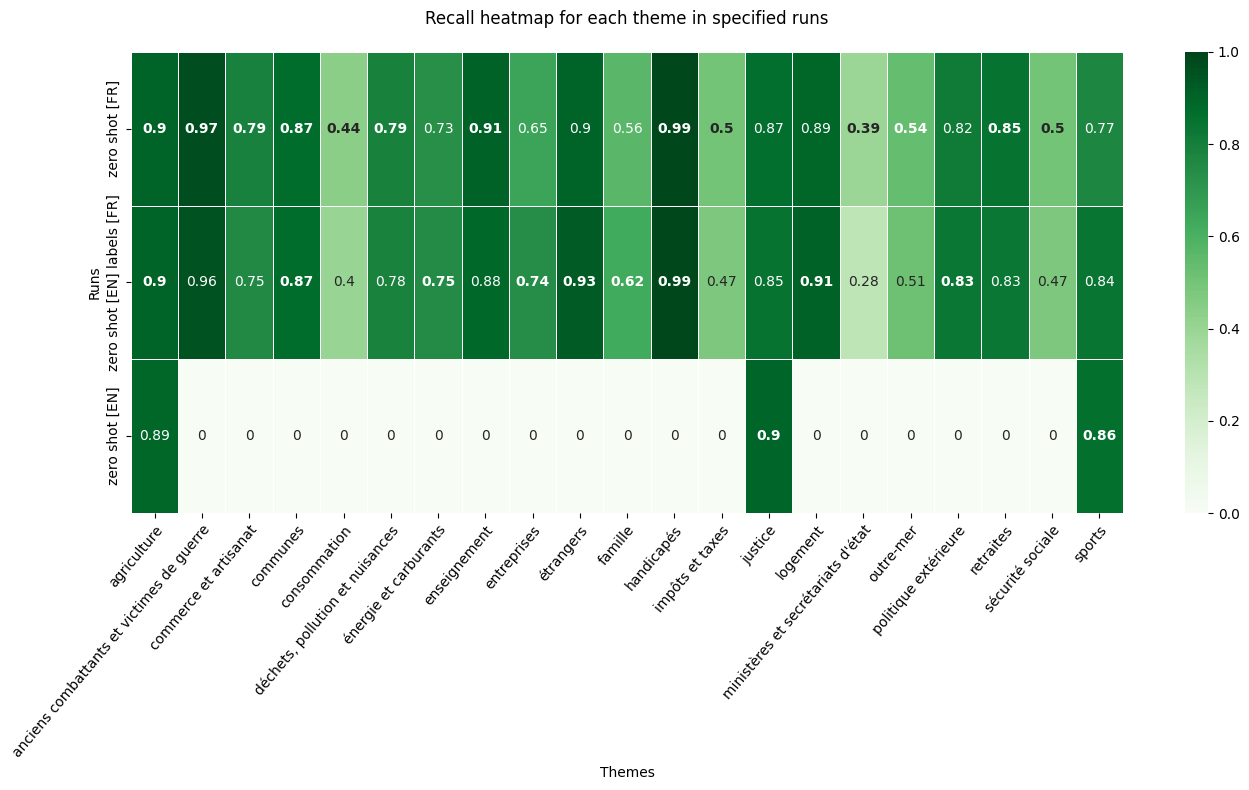

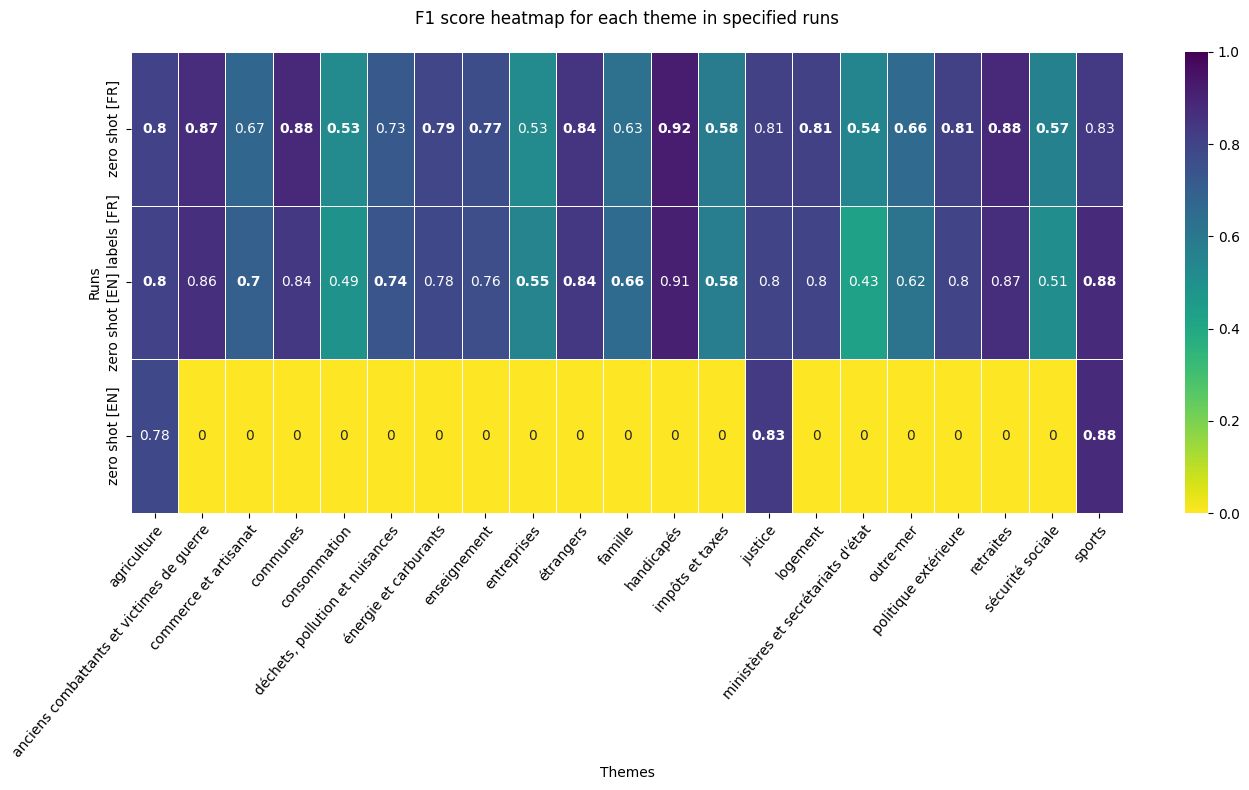

In [10]:
plot_precision_heatmap(RUN_IDS)
plot_recall_heatmap(RUN_IDS)
plot_f1_score_heatmap(RUN_IDS)

### Inter-coder agreement (Cohen’s Kappa / Krippendorff’s alpha)

Here, we take at the **inter-coder agreement** between every runs. The first metrics we're looking for is the **Krippendorff's Alpha**, which measures the degree of agreement between different annotators beyond what would be expected by chance. In other words, it tells you how much the annotators agree with each other when categorizing or labeling items, considering the possibility of random agreement.

Krippendorff’s Alpha ranges from -1 to 1:

- **1** means perfect agreement: All annotators classified every item the same way.
  - 0.81 - 1.00 : Almost perfect agreement;
  - 0.61 - 0.80 : Substantial agreement;
  - 0.41 - 0.60 : Moderate agreement;
  - 0.21 - 0.40 : Fair agreement;
  - 0.00 - 0.20 : Slight agreement.
- **0** means no agreement beyond what would be expected by chance.
- **Negative values** indicate that the agreement is worse than chance, meaning there is systematic disagreement among annotators.


In [11]:
print(f"Krippendorff's alpha : {compute_krippendorff_alpha(RUN_IDS):.2f}")

ValueError: 'social security' is not in list

In [ ]:
plot_cohen_kappa(RUN_IDS)

## Confidence

In [ ]:
plot_confidence_calibration_curve(RUN_IDS[0], ConfidenceType.Logprobs)

## Statistical tests
